In [1]:
import random
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
import hdbscan
random_state = np.random.RandomState(39)
random.seed(39)

In [2]:
study_name="turnbaugh"
taxa_rank="genus"
transformation="Log10"
unifrac_measure="gunifrac"

tempfiles_path = '/home/pedro/Desktop/Masters/4th Semester/Thesis/experiments/results/turnbaugh/genus_clr_gunifrac/tempfiles'
tempfiles = os.listdir(tempfiles_path)

for file in tempfiles:
    if all(x in file for x in [study_name, taxa_rank, transformation, unifrac_measure, 'class1', 'otus']):
        class1_otu = os.path.join(tempfiles_path,file)
    elif all(x in file for x in [study_name, taxa_rank, transformation, unifrac_measure, 'class1', 'distances']):
        class1_distances = os.path.join(tempfiles_path,file)
    elif all(x in file for x in [study_name, taxa_rank, transformation, unifrac_measure, 'class2', 'otus']):
        class2_otu = os.path.join(tempfiles_path,file)
    elif all(x in file for x in [study_name, taxa_rank, transformation, unifrac_measure, 'class2', 'distances']):
        class2_distances = os.path.join(tempfiles_path,file)

FileNotFoundError: [Errno 2] No such file or directory: '/home/pedro/Desktop/Masters/4th Semester/Thesis/experiments/results/turnbaugh/genus_clr_gunifrac/tempfiles'

In [4]:
study_name="sokol"
taxa_rank="genus"
transformation="clr"
unifrac_measure="gunifrac"

tempfiles_path = '/home/pedro/Desktop/Masters/4th Semester/Thesis/experiments/results/sokol/genus_clr_gunifrac/tempfiles'
tempfiles = os.listdir(tempfiles_path)

for file in tempfiles:
    if all(x in file for x in [study_name, taxa_rank, transformation, unifrac_measure, 'class1', 'otus']):
        class1_otu = os.path.join(tempfiles_path,file)
    elif all(x in file for x in [study_name, taxa_rank, transformation, unifrac_measure, 'class1', 'distances']):
        class1_distances = os.path.join(tempfiles_path,file)
    elif all(x in file for x in [study_name, taxa_rank, transformation, unifrac_measure, 'class2', 'otus']):
        class2_otu = os.path.join(tempfiles_path,file)
    elif all(x in file for x in [study_name, taxa_rank, transformation, unifrac_measure, 'class2', 'distances']):
        class2_distances = os.path.join(tempfiles_path,file)

FileNotFoundError: [Errno 2] No such file or directory: '/home/pedro/Desktop/Masters/4th Semester/Thesis/experiments/results/sokol/genus_clr_gunifrac/tempfiles'

In [6]:
study_name="claesson"
taxa_rank="genus"
transformation="Log10"
unifrac_measure="gunifrac"

tempfiles_path = '/home/pedro/Desktop/Masters/4th Semester/Thesis/experiments/results/claesson/genus_Log10_gunifrac/tempfiles'
tempfiles = os.listdir(tempfiles_path)

for file in tempfiles:
    if all(x in file for x in [study_name, taxa_rank, transformation, unifrac_measure, 'class1', 'otus']):
        class1_otu = os.path.join(tempfiles_path,file)
    elif all(x in file for x in [study_name, taxa_rank, transformation, unifrac_measure, 'class1', 'distances']):
        class1_distances = os.path.join(tempfiles_path,file)
    elif all(x in file for x in [study_name, taxa_rank, transformation, unifrac_measure, 'class2', 'otus']):
        class2_otu = os.path.join(tempfiles_path,file)
    elif all(x in file for x in [study_name, taxa_rank, transformation, unifrac_measure, 'class2', 'distances']):
        class2_distances = os.path.join(tempfiles_path,file)

In [158]:
## KNN CLASS1 - EUCLIDEAN DISTANCE 

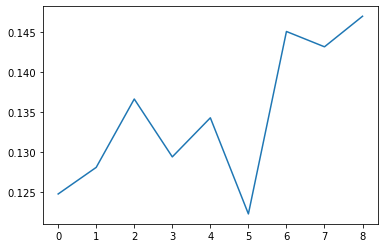

In [79]:
df = pd.read_csv(class1_otu, index_col=[0])
X = df.values
nbrs = NearestNeighbors(metric='braycurtis')
nbrs.fit(X)
distances, indexes = nbrs.kneighbors(X)
plt.plot(distances.mean(axis =1))

In [80]:
threshold = pd.Series(distances.mean(axis = 1)).quantile(0.85)
outlier_index = np.where(distances.mean(axis = 1) > threshold)
outlier_values = df.iloc[outlier_index]
outlier_samples = outlier_values.index.values.tolist()
print(len(outlier_samples))

2


In [176]:
## KNN CLASS2 - EUCLIDEAN DISTANCE 

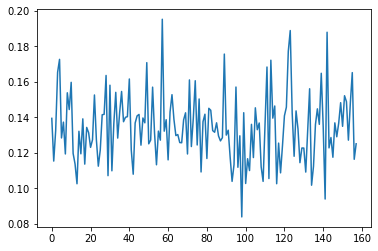

In [81]:
df = pd.read_csv(class2_otu, index_col=[0])
X = df.values
nbrs = NearestNeighbors(metric='braycurtis')
nbrs.fit(X)
distances, indexes = nbrs.kneighbors(X)
plt.plot(distances.mean(axis =1))

In [82]:
threshold = pd.Series(distances.mean(axis = 1)).quantile(0.85)
outlier_index = np.where(distances.mean(axis = 1) > threshold)
outlier_values = df.iloc[outlier_index]
outlier_samples = outlier_values.index.values.tolist()
print(len(outlier_samples))

24


In [180]:
## KNN CLASS1 - UNIFRAC DISTANCE 

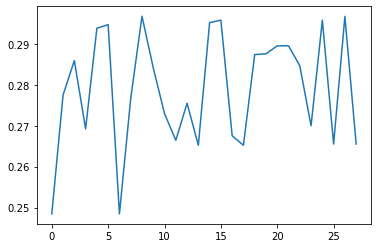

In [55]:
df_distances = pd.read_csv(class1_distances, index_col=[0])
nbrs = NearestNeighbors(n_neighbors = 2, metric='precomputed')
nbrs.fit(df_distances)
distances, indexes = nbrs.kneighbors(df_distances)
plt.plot(distances.mean(axis =1))

In [56]:
threshold = pd.Series(distances[:, 1]).quantile(0.85)
outlier_index = np.where(distances[:, 1] > threshold)
outlier_values = df.iloc[outlier_index]
outlier_samples = outlier_values.index.values.tolist()
print(len(outlier_samples))

5


In [15]:
## KNN CLASS2 - UNIFRAC DISTANCE

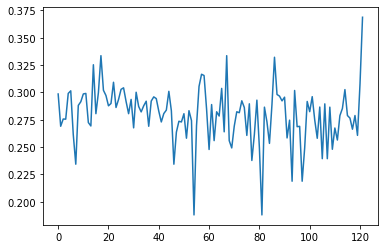

In [53]:
df_distances = pd.read_csv(class2_distances, index_col=[0])
nbrs = NearestNeighbors(n_neighbors = 2, metric='precomputed')
nbrs.fit(df_distances)
distances, indexes = nbrs.kneighbors(df_distances)
plt.plot(distances.mean(axis =1))

In [54]:
threshold = pd.Series(distances[:, 1]).quantile(0.85)
outlier_index = np.where(distances[:, 1] > threshold)
outlier_values = df.iloc[outlier_index]
outlier_samples = outlier_values.index.values.tolist()
print(len(outlier_samples))

19


In [ ]:
## ISOLATION FOREST CLASS 1

In [99]:
df = pd.read_csv(class1_otu, index_col=[0])
model=IsolationForest(n_estimators=100,max_samples='auto', contamination=float(0.05), random_state=random_state)
model.fit(df.values)
df['anomaly_score'] = model.predict(df)
outlier_samples = df[df['anomaly_score']==-1].index.values.tolist()
print(len(outlier_samples))

2


/home/pedro/miniconda3/envs/thesis_ml/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


In [21]:
## ISOLATION FOREST CLASS 2

In [101]:
df = pd.read_csv(class2_otu, index_col=[0])
model=IsolationForest(n_estimators=100,max_samples='auto', contamination=float(0.05),random_state=random_state)
df['anomaly_score'] = model.fit_predict(df.values)
outlier_samples = df[df['anomaly_score']==-1].index.values.tolist()
print(len(outlier_samples))

7


In [ ]:
## DBSCAN CLASS 1

In [68]:
df_distances = pd.read_csv(class1_distances, index_col=[0])
clustering = DBSCAN(eps=0.4, min_samples=2, metric='precomputed')
clustering.fit(df_distances)
df_distances['anomaly_score'] = clustering.labels_
outlier_samples = df_distances[df_distances['anomaly_score']==-1].index.values.tolist()
print(len(outlier_samples))

28


In [ ]:
## DBSCAN CLASS 2

In [110]:
df_distances = pd.read_csv(class2_distances, index_col=[0])
clustering = DBSCAN(eps=0.2, min_samples=2)
clustering.fit_predict(df_distances)
df_distances['anomaly_score'] = clustering.labels_
outlier_samples = df_distances[df_distances['anomaly_score']==-1].index.values.tolist()
print(len(outlier_samples))

122


In [124]:
## HDBSCAN CLASS 1

In [25]:
df_distances = pd.read_csv(class1_distances, index_col=[0])
clusterer = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=2, alpha=0.4)
clusterer.fit(df_distances)
df_distances['anomaly_score'] = clusterer.labels_
outlier_samples = df_distances[df_distances['anomaly_score']==-1].index.values.tolist()
print(len(outlier_samples))

4


In [26]:
## HDBSCAN CLASS 2

In [27]:
df_distances = pd.read_csv(class2_distances, index_col=[0])
clusterer = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=2, alpha=0.4)
clusterer.fit(df_distances)
df_distances['anomaly_score'] = clusterer.labels_
outlier_samples = df_distances[df_distances['anomaly_score']==-1].index.values.tolist()
print(len(outlier_samples))

1


/home/pedro/miniconda3/envs/thesis_ml/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/pedro/miniconda3/envs/thesis_ml/lib/python3.10/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

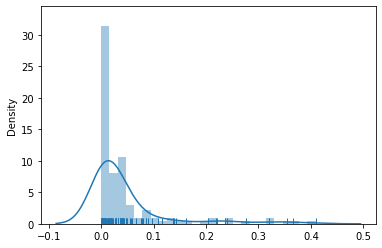

In [219]:
sns.distplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], rug=True)

In [57]:
threshold = pd.Series(clusterer.outlier_scores_).quantile(0.8)
outliers = np.where(clusterer.outlier_scores_ > threshold)

In [58]:
outliers

(array([ 12,  13,  14,  43,  51,  55,  57,  58,  60,  70,  75,  77,  83,
         84,  86,  92,  95,  96,  98, 102, 103, 109, 111, 113, 121]),)

In [102]:
model.random_state

IsolationForest(contamination=0.05,
                random_state=RandomState(MT19937) at 0x7FC9239E2840)

In [ ]:
df = pd.DataFrame(columns=['species','name','age'])

In [79]:
df2 = pd.DataFrame(index=df.index)
df2.insert(0, 'id', df.index)

In [80]:
df2

,id
100015.518484,100015.518484
100222.518527,100222.518527
7130.518412,7130.518412
7200.518492,7200.518492
100226.518568,100226.518568
...,...
7454.518419,7454.518419
7352.518512,7352.518512
7242A.518519,7242A.518519
7646.518523,7646.518523


In [87]:
def set_anomaly_by_name(row, outlier_list):
    if row.id in outlier_values:
        return 'anomaly'
    return 'notanomaly'

In [84]:
df2['a1'] = df2.apply(set_anomaly, outlier_list=outlier_samples , axis=1)

In [104]:
df.anomaly_score

100015.518484    1
100222.518527    1
7130.518412      1
7200.518492      1
100226.518568    1
                ..
7454.518419      1
7352.518512      1
7242A.518519     1
7646.518523      1
100139.518500    1
Name: anomaly_score, Length: 122, dtype: int64

In [88]:
outlier_samples

[7298.518487,
 7313.518451,
 7356.518615,
 7360.518446,
 7361.518432,
 7365.518636,
 7385.518529,
 7610.51859,
 7662.518467,
 7664.518599,
 7844.518483,
 7847.51841,
 7848.518594,
 7855.518447,
 7858.518581,
 7860.518628,
 7861.518583,
 7862.518458,
 7870.518457,
 7879.518469,
 7899.51856,
 7904.5186,
 7906.518589,
 7908.518449,
 7909.518566,
 7910.518536,
 7911.51861,
 7912.518472]

In [89]:
class1_distances

'results/sokol/tempfiles/sokol_species_counts_unifrac_class1_distances.csv'

In [91]:
class1_distances.split('/')[-1]

'sokol_species_counts_unifrac_class1_distances.csv'

In [105]:
'knn_' + '_'.join(class1_distances.split('/')[-1].split('_')[1:3])

'knn_species_counts'